In [2]:
import numpy as np
import pickle
from src.plot import plot_connectivity_maps, plot_graphs
from src.graph import process_participants

TEST_PATH = "/Users/h1de0us/uni/mer-eeg-analysis/data/deap_filtered/s01.dat"

# theta, alpha, beta, gamma
bands_min = [4, 8, 12, 30]
bands_max = [8, 12, 30, 45]

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
x = pickle.load(open(TEST_PATH, "rb"), encoding="latin1")
data_user1 = x["data"]
labels_user1 = x["labels"]
data_user1.shape, labels_user1.shape

((40, 40, 8064), (40, 4))

In [5]:
graph = process_participants(TEST_PATH)[0]

Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape: (n_channels, n_samples): 32 7680
Data shape

In [6]:
# epochs 
epochs = graph._compute_epochs()
epochs

Using data from preloaded Raw for 20 events and 384 original time points ...
0 bad epochs dropped
Epochs shape: (20, 32, 384)


Number of events,20
Events,1: 20
Time range,0.000 – 2.992 s
Baseline,off


### PLV computation

In [7]:
con_plv = graph.compute_connectivity(method='plv', fmin=bands_min, fmax=bands_max)

Using data from preloaded Raw for 20 events and 384 original time points ...


In [8]:
con_plv.get_data().shape

(1024, 4)

In [9]:
print(con_plv.get_data(output="dense").shape) # (n_channels, n_channels, n_bands)

(32, 32, 4)


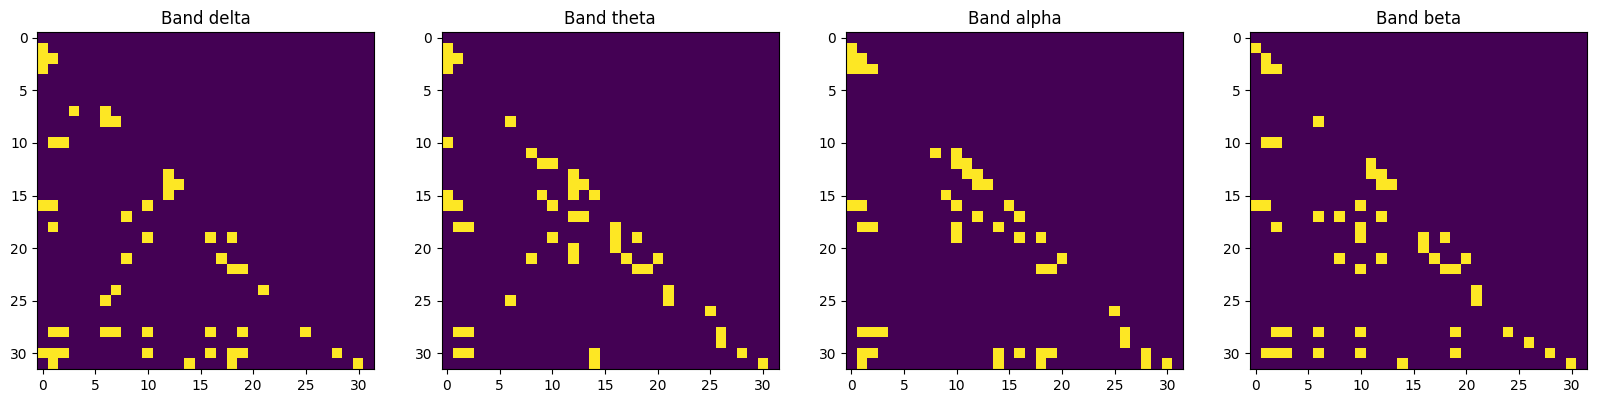

In [10]:
con_data = con_plv.get_data(output="dense")
plot_connectivity_maps(con_data, n_connections=50)

In [11]:
channel_names = {i: channel for i, channel in enumerate(graph.channels)}

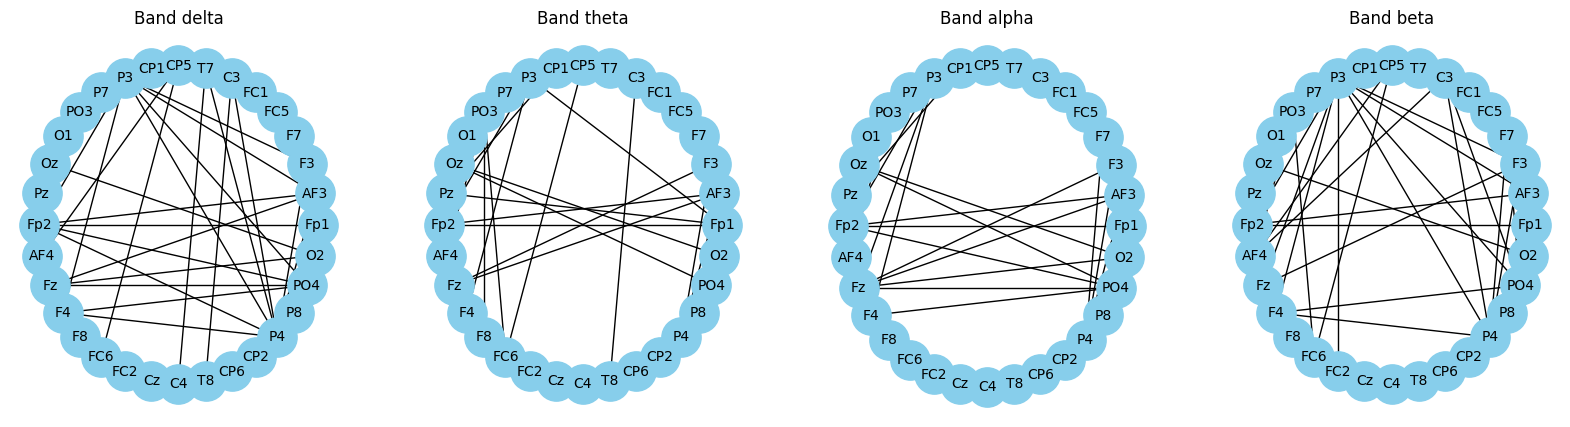

In [12]:
plot_graphs(con_data, n_connections=50, channel_names=channel_names)

### PLI computation

In [13]:
con_pli = graph.compute_connectivity(method='pli', fmin=bands_min, fmax=bands_max)

Using data from preloaded Raw for 20 events and 384 original time points ...


In [14]:
con_pli

<SpectralConnectivity | freq : [6.000000, 37.500000], , nave : 20, nodes, n_estimated : 32, 1024, ~48 kB>

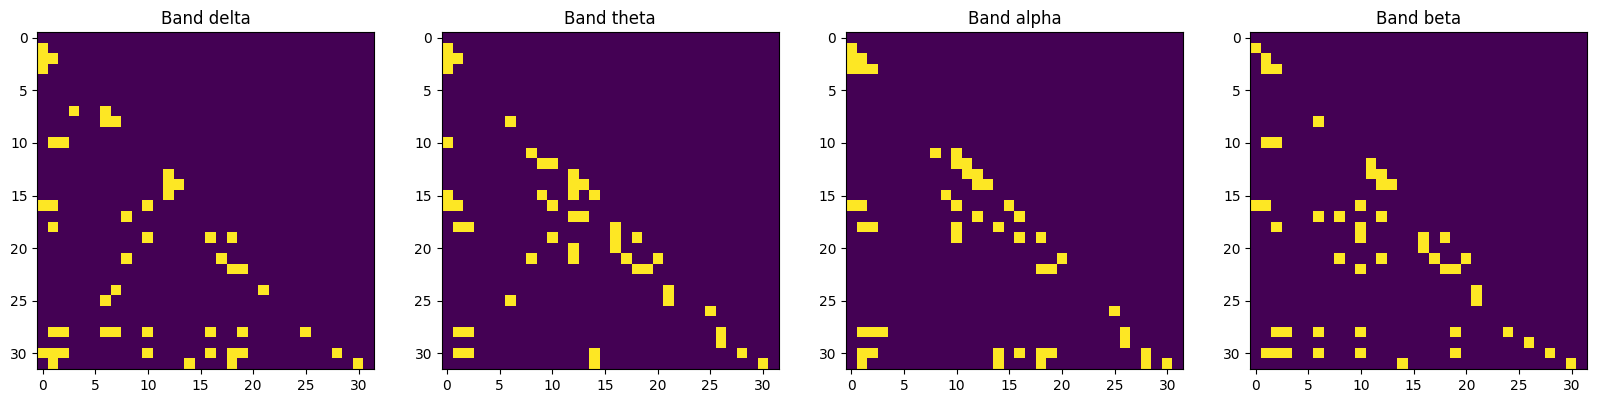

In [15]:
from src.plot import plot_connectivity_maps, plot_graphs

con_data = con_pli.get_data(output="dense")
plot_connectivity_maps(con_data, n_connections=50)

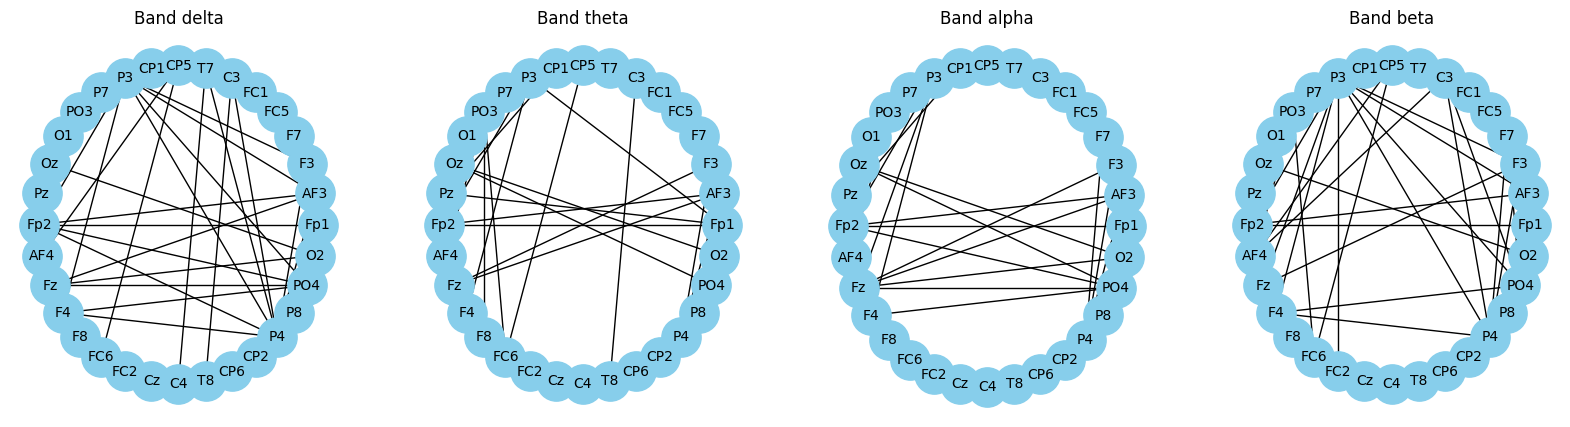

In [16]:
plot_graphs(con_data, n_connections=50, channel_names=channel_names)

### IMC computation (Imaginary part of coherency)

In [17]:
con_imcoh = graph.compute_connectivity(method='imcoh', fmin=bands_min, fmax=bands_max)

Using data from preloaded Raw for 20 events and 384 original time points ...


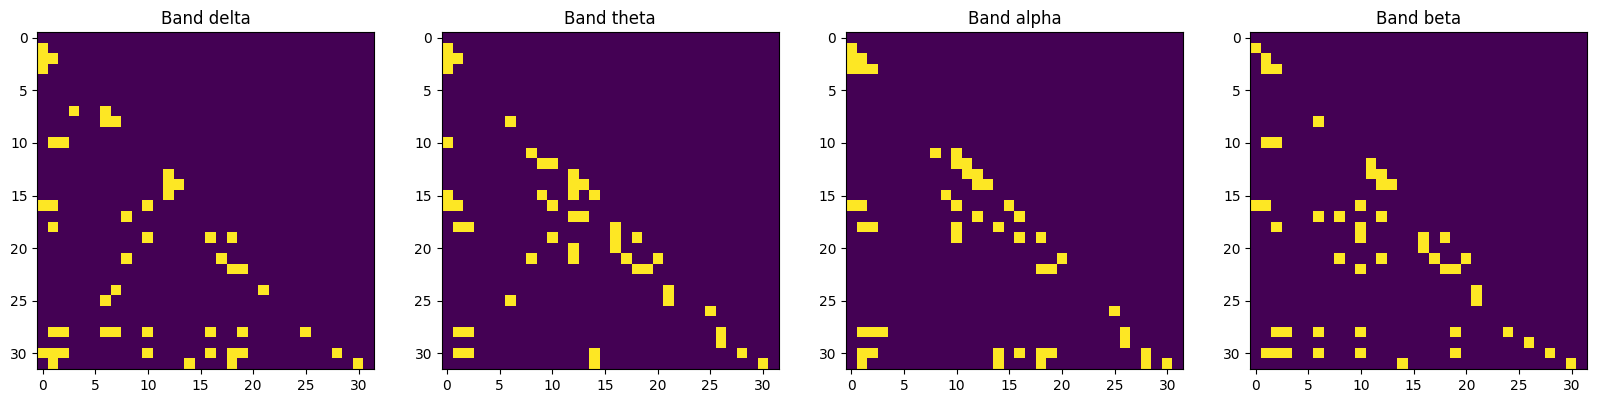

In [18]:
con_data = con_imcoh.get_data(output="dense")
plot_connectivity_maps(con_data, n_connections=50)

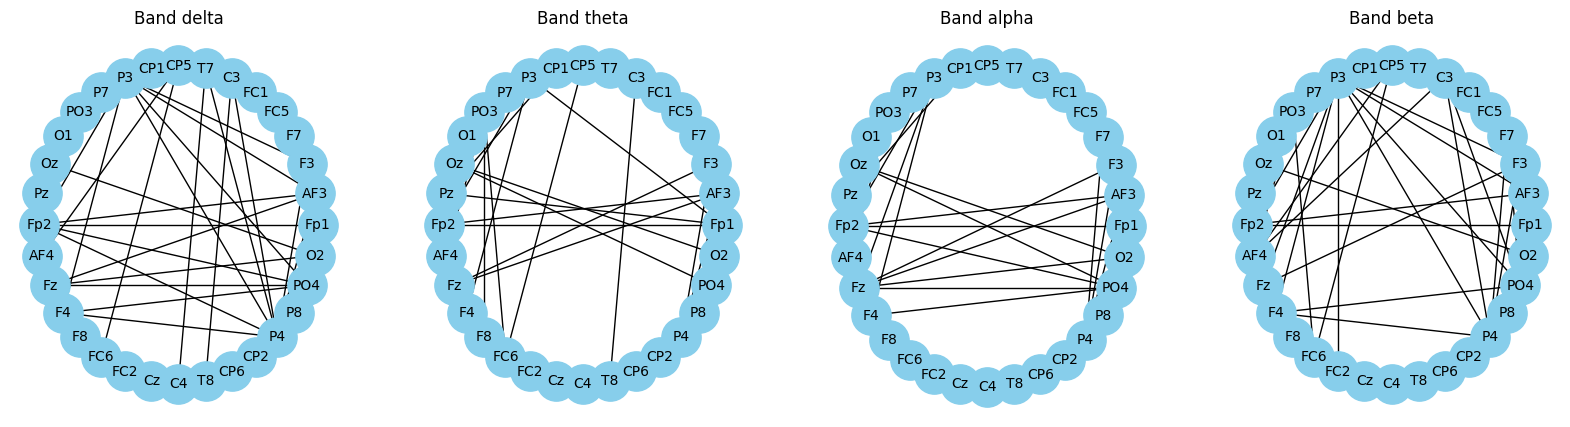

In [19]:
plot_graphs(con_data, n_connections=50, channel_names=channel_names)

In [20]:
np.isclose(con_pli.get_data(output="dense"), con_imcoh.get_data(output="dense")).all() # wtf

True

In [24]:
con_plv = graph.compute_connectivity(method='plv', fmin=bands_min, fmax=bands_max, faverage=True, duration=3)
con_pli = graph.compute_connectivity(method='pli', fmin=bands_min, fmax=bands_max, faverage=True, duration=3)
con_wpli = graph.compute_connectivity(method='wpli', fmin=bands_min, fmax=bands_max, faverage=True, duration=10)
np.isclose(con_pli.get_data(output="dense"), con_wpli.get_data(output="dense")).all() 

Using data from preloaded Raw for 20 events and 384 original time points ...
0 bad epochs dropped
Epochs shape: (20, 32, 384)
Using data from preloaded Raw for 20 events and 384 original time points ...
Using data from preloaded Raw for 20 events and 384 original time points ...
Using data from preloaded Raw for 6 events and 1280 original time points ...
0 bad epochs dropped
Epochs shape: (6, 32, 1280)
Using data from preloaded Raw for 6 events and 1280 original time points ...


False

In [25]:
con_plv_time = graph.compute_connectivity_time(method='plv', faverage=False, duration=10)

In [26]:
con_pli_time = graph.compute_connectivity_time(method='pli', faverage=False, duration=10)